# visualization:

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
data=pd.read_csv("cleaned_data.csv")
df=data.copy()

In [3]:
df

,city,Country,Avg 2020,January,February,March,April,May,June,July,August,September,October,November,December,Avg 2019,Classify Groups
0,Hotan,China,110.2,93.7,124.7,264.4,176.4,101.9,113.7,85.2,84.0,100.7,104.2,59.7,51.9,110.1,5
1,Ghaziabad,India,106.6,146.3,111.8,76.9,88.0,84.1,69.0,62.7,58.5,84.7,157.3,161.0,178.9,110.2,5
2,Bulandshahr,India,98.4,116.9,97.8,71.7,86.4,85.3,65.0,53.6,57.4,82.2,145.0,150.0,167.1,89.4,5
3,Bhiwadi,India,95.5,100.7,102.3,81.4,66.0,83.5,69.0,61.3,57.0,99.7,157.8,126.5,138.3,83.4,5
4,Noida,India,94.3,131.6,99.2,65.5,76.6,69.7,62.5,57.3,49.1,74.9,146.1,138.2,160.1,97.7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,Grantham,USA,5.6,5.5,6.7,4.0,3.6,3.6,6.1,8.0,7.2,5.0,3.5,6.0,6.7,6.0,1
3641,Utica,USA,5.6,7.7,6.9,4.5,3.3,3.9,4.9,4.8,6.6,6.0,5.3,7.0,6.2,5.5,1
3642,Bennington,USA,5.6,5.8,7.8,4.8,4.2,4.2,5.1,6.1,6.0,4.9,4.5,6.5,7.6,5.8,1
3643,Targinie,Australia,5.5,7.0,6.1,4.6,4.4,3.8,4.0,3.6,4.4,5.5,8.5,8.6,5.0,7.7,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3645 entries, 0 to 3644
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             3645 non-null   object 
 1   Country          3645 non-null   object 
 2   Avg 2020         3645 non-null   float64
 3   January          3645 non-null   float64
 4   February         3645 non-null   float64
 5   March            3645 non-null   float64
 6   April            3645 non-null   float64
 7   May              3645 non-null   float64
 8   June             3645 non-null   float64
 9   July             3645 non-null   float64
 10  August           3645 non-null   float64
 11  September        3645 non-null   float64
 12  October          3645 non-null   float64
 13  November         3645 non-null   float64
 14  December         3645 non-null   float64
 15  Avg 2019         3645 non-null   float64
 16  Classify Groups  3645 non-null   int64  
dtypes: float64(14)

In [5]:
df['Classify Groups'].value_counts()

1    1682
3    1163
2     560
4     192
5      48
Name: Classify Groups, dtype: int64

### We are grouping by country, we will see how many Cities we have for each country and then we will see how many cities from each country are in the levels 1,2,3,4,5.

In [6]:
country_grp=df.groupby(['Country'])

In [7]:
numCountry=df['Country'].value_counts()
numCountry

USA           1178
Japan          512
China          381
Germany        142
France         114
              ... 
Costa Rica       1
Jordan           1
Algeria          1
Uganda           1
Bangladesh       1
Name: Country, Length: 89, dtype: int64

In [8]:
country_level_1=country_grp['Classify Groups'].apply(lambda x:x.isin([1]).sum())
country_level_2=country_grp['Classify Groups'].apply(lambda x:x.isin([2]).sum())
country_level_3=country_grp['Classify Groups'].apply(lambda x:x.isin([3]).sum())
country_level_4=country_grp['Classify Groups'].apply(lambda x:x.isin([4]).sum())
country_level_5=country_grp['Classify Groups'].apply(lambda x:x.isin([5]).sum())

In [9]:
groups_df=pd.concat([numCountry,country_level_1,country_level_2,
                     country_level_3,country_level_4,country_level_5],axis='columns',sort=False)
groups_df

,Country,Classify Groups,Classify Groups,Classify Groups,Classify Groups,Classify Groups
USA,1178,716,203,259,0,0
Japan,512,320,146,46,0,0
China,381,6,6,222,134,13
Germany,142,101,36,5,0,0
France,114,91,20,3,0,0
...,...,...,...,...,...,...
Costa Rica,1,1,0,0,0,0
Jordan,1,0,0,1,0,0
Algeria,1,0,0,1,0,0
Uganda,1,0,0,1,0,0


In [10]:
groups_df.columns = ['Num Of Cities', 'Good', 'Moderate', 'UFSG','Unhealthy','Very Unhealthy']
groups_df

,Num Of Cities,Good,Moderate,UFSG,Unhealthy,Very Unhealthy
USA,1178,716,203,259,0,0
Japan,512,320,146,46,0,0
China,381,6,6,222,134,13
Germany,142,101,36,5,0,0
France,114,91,20,3,0,0
...,...,...,...,...,...,...
Costa Rica,1,1,0,0,0,0
Jordan,1,0,0,1,0,0
Algeria,1,0,0,1,0,0
Uganda,1,0,0,1,0,0


In [11]:
groups_df.head(20)

,Num Of Cities,Good,Moderate,UFSG,Unhealthy,Very Unhealthy
USA,1178,716,203,259,0,0
Japan,512,320,146,46,0,0
China,381,6,6,222,134,13
Germany,142,101,36,5,0,0
France,114,91,20,3,0,0
Canada,97,91,3,3,0,0
United Kingdom,89,76,12,1,0,0
India,86,0,0,18,37,31
Spain,76,49,16,11,0,0
Australia,63,55,4,4,0,0


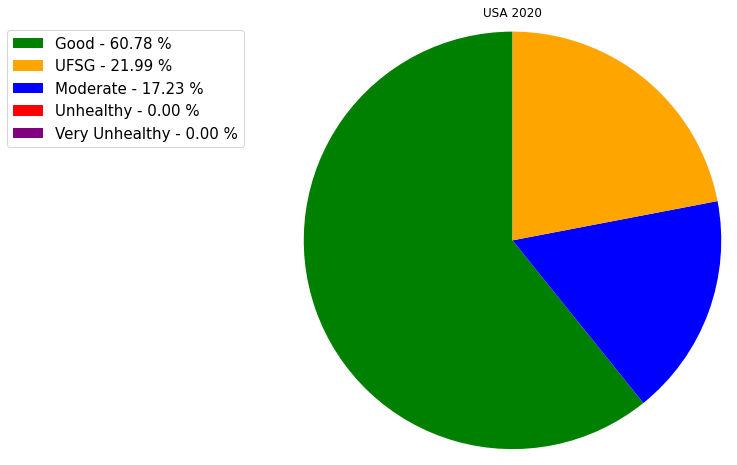

In [12]:
x =['Good','Moderate','UFSG','Unhealthy','Very Unhealthy']
y = np.array(groups_df.loc[['USA'],["Good", "Moderate", "UFSG", "Unhealthy", "Very Unhealthy"]].to_numpy()[0])
colors = ['green','blue','orange','red','purple']
percent = 100.*y/y.sum()
plt.figure(figsize = (8,8))
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels,bbox_to_anchor=(-0.1, 1.),fontsize=15)
plt.title("USA 2020")
plt.show()

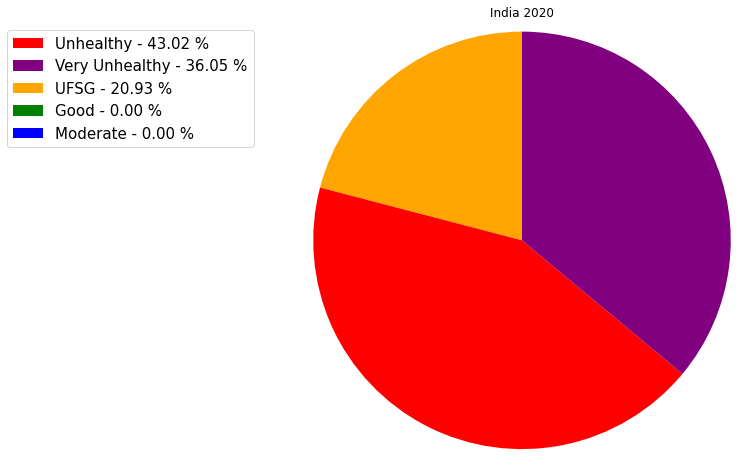

In [13]:
x =['Good','Moderate','UFSG','Unhealthy','Very Unhealthy']
y = np.array(groups_df.loc[['India'],["Good", "Moderate", "UFSG", "Unhealthy", "Very Unhealthy"]].to_numpy()[0])
colors = ['green','blue','orange','red','purple']
percent = 100.*y/y.sum()
plt.figure(figsize = (8,8))
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels,bbox_to_anchor=(-0.1, 1.),fontsize=15)
plt.title("India 2020")
plt.show()

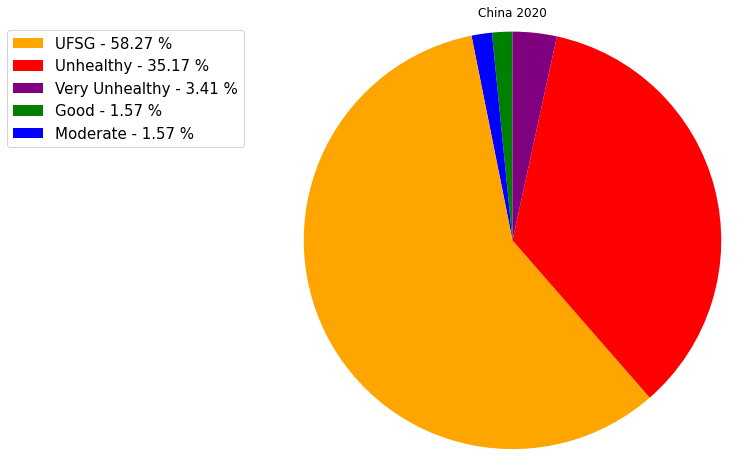

In [14]:
x =['Good','Moderate','UFSG','Unhealthy','Very Unhealthy']
y = np.array(groups_df.loc[['China'],["Good", "Moderate", "UFSG", "Unhealthy", "Very Unhealthy"]].to_numpy()[0])
colors = ['green','blue','orange','red','purple']
percent = 100.*y/y.sum()
plt.figure(figsize = (8,8))
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels,bbox_to_anchor=(-0.1, 1.),fontsize=15)
plt.title("China 2020")
plt.show()

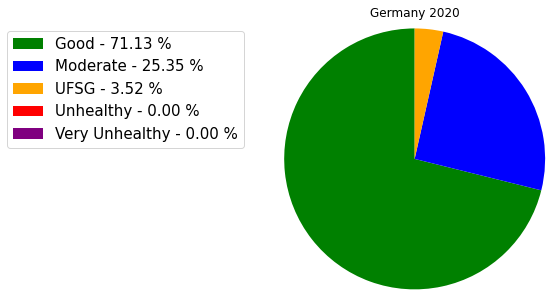

In [15]:
x =['Good','Moderate','UFSG','Unhealthy','Very Unhealthy']
y = np.array(groups_df.loc[['Germany'],["Good", "Moderate", "UFSG", "Unhealthy", "Very Unhealthy"]].to_numpy()[0])
colors = ['green','blue','orange','red','purple']
percent = 100.*y/y.sum()
plt.figure(figsize = (5,5))
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels,bbox_to_anchor=(-0.1, 1.),fontsize=15)
plt.title("Germany 2020")
plt.show()

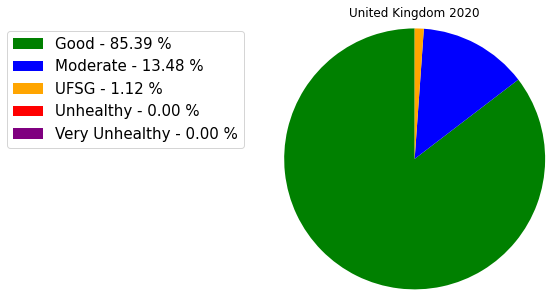

In [16]:
x =['Good','Moderate','UFSG','Unhealthy','Very Unhealthy']
y = np.array(groups_df.loc[['United Kingdom'],["Good", "Moderate", "UFSG", "Unhealthy", "Very Unhealthy"]].to_numpy()[0])
colors = ['green','blue','orange','red','purple']
percent = 100.*y/y.sum()
plt.figure(figsize = (5,5))
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels,bbox_to_anchor=(-0.1, 1.),fontsize=15)
plt.title("United Kingdom 2020")
plt.show()

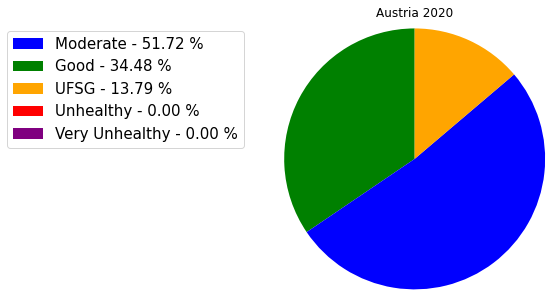

In [17]:
x =['Good','Moderate','UFSG','Unhealthy','Very Unhealthy']
y = np.array(groups_df.loc[['Austria'],["Good", "Moderate", "UFSG", "Unhealthy", "Very Unhealthy"]].to_numpy()[0])
colors = ['green','blue','orange','red','purple']
percent = 100.*y/y.sum()
plt.figure(figsize = (5,5))
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels,bbox_to_anchor=(-0.1, 1.),fontsize=15)
plt.title("Austria 2020")
plt.show()

In [18]:
January_med=country_grp['January'].median()
February_med=country_grp['February'].median()
March_med=country_grp['March'].median()
April_med=country_grp['April'].median()
May_med=country_grp['May'].median()
June_med=country_grp['June'].median()
July_med=country_grp['July'].median()
August_med=country_grp['August'].median()
September_med=country_grp['September'].median()
October_med=country_grp['October'].median()
November_med=country_grp['November'].median()
December_med=country_grp['December'].median()

In [19]:
Months_median_df=pd.concat([January_med,February_med,
                     March_med,April_med,May_med,June_med,July_med,
                           August_med,September_med,October_med,November_med,December_med],axis='columns',sort=True)
Months_median_df

,January,February,March,April,May,June,July,August,September,October,November,December
Country,,,,,,,,,,,,
Afghanistan,93.60,64.30,35.80,20.90,13.60,20.40,19.8,26.3,27.60,40.80,104.50,117.10
Algeria,29.30,25.90,18.80,18.20,17.00,19.10,21.0,19.8,18.20,17.10,21.20,16.90
Angola,8.10,8.70,8.50,7.30,14.60,18.70,20.0,19.5,18.00,11.60,10.60,10.70
Argentina,12.80,10.40,14.20,16.40,22.00,21.50,15.8,15.3,13.20,9.20,6.10,5.00
Armenia,50.60,32.25,20.75,12.05,10.10,11.60,14.1,14.2,20.90,24.95,34.55,57.80
...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,29.00,18.50,24.20,30.30,8.90,8.80,7.9,9.3,12.50,22.90,27.60,30.70
United Arab Emirates,18.05,27.75,24.20,21.20,29.20,38.50,36.3,36.5,35.90,23.45,27.05,23.55
United Kingdom,9.70,7.10,9.70,12.60,7.40,7.60,4.4,7.9,7.20,5.80,12.30,8.20


In [20]:
#Months_median_df.T.plot(kind='bar')
Months_median_df=Months_median_df.T
Months_median_df

Country,Afghanistan,Algeria,Angola,Argentina,Armenia,Australia,Austria,Bahrain,Bangladesh,Belgium,...,Taiwan,Thailand,Turkey,USA,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uzbekistan,Vietnam
January,93.6,29.3,8.1,12.8,50.60,11.6,21.5,31.2,184.4,12.9,...,21.10,44.7,29.80,8.20,48.0,29.0,18.05,9.7,38.2,29.65
February,64.3,25.9,8.7,10.4,32.25,6.2,8.0,39.9,147.1,7.9,...,20.95,49.0,25.95,8.10,29.3,18.5,27.75,7.1,31.2,26.80
March,35.8,18.8,8.5,14.2,20.75,4.8,11.4,38.0,94.3,11.7,...,20.25,29.1,21.60,6.40,22.1,24.2,24.20,9.7,35.6,28.60
April,20.9,18.2,7.3,16.4,12.05,6.5,11.0,38.8,54.0,16.3,...,20.30,25.7,16.50,6.10,11.9,30.3,21.20,12.6,21.2,28.25
May,13.6,17.0,14.6,22.0,10.10,8.1,7.6,42.9,38.6,10.1,...,12.15,16.8,14.40,5.20,14.2,8.9,29.20,7.4,22.1,24.75
June,20.4,19.1,18.7,21.5,11.60,9.2,6.1,37.1,28.5,8.5,...,7.05,7.8,12.90,6.50,26.5,8.8,38.50,7.6,22.3,17.35
July,19.8,21.0,20.0,15.8,14.10,9.0,7.1,51.6,24.2,5.7,...,7.40,8.6,12.80,7.55,36.9,7.9,36.30,4.4,24.6,15.40
August,26.3,19.8,19.5,15.3,14.20,7.2,8.2,36.9,24.5,9.8,...,9.50,9.6,11.10,10.30,35.6,9.3,36.50,7.9,28.9,13.00
September,27.6,18.2,18.0,13.2,20.90,6.2,9.0,46.7,30.3,10.1,...,15.65,10.1,15.35,13.70,30.2,12.5,35.90,7.2,32.0,17.55
October,40.8,17.1,11.6,9.2,24.95,5.4,9.1,43.3,51.7,6.9,...,14.20,14.8,20.35,10.10,25.4,22.9,23.45,5.8,36.0,19.40


In [21]:
Months_median_df.India

January      59.50
February     59.30
March        44.25
April        38.80
May          39.50
June         35.60
July         31.25
August       29.70
September    39.80
October      57.30
November     64.40
December     68.35
Name: India, dtype: float64

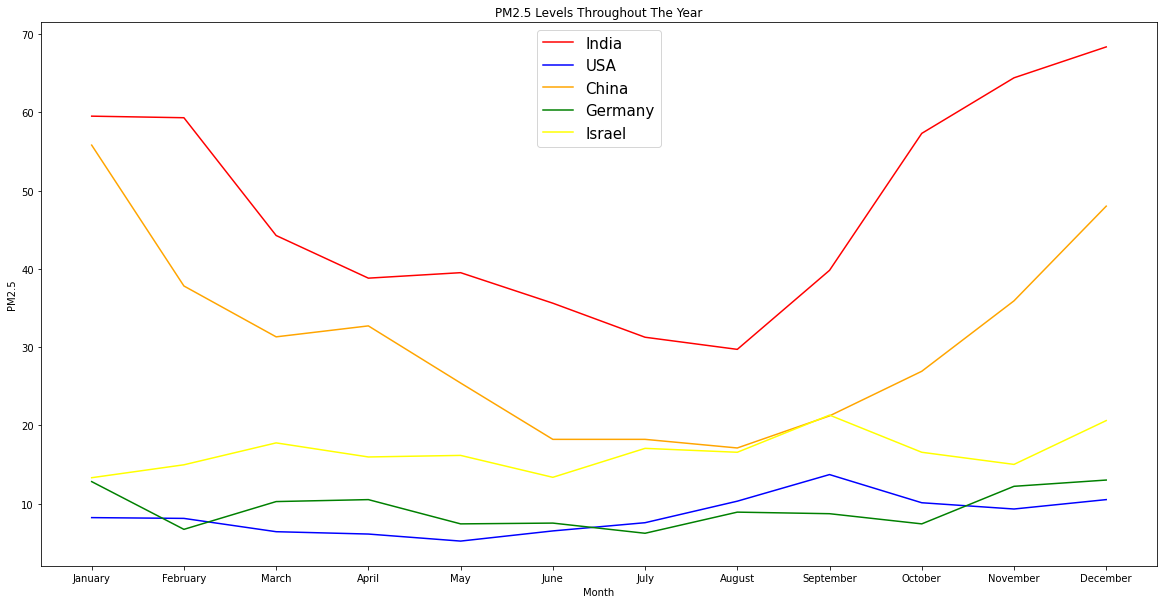

In [22]:
figure, axs = plt.subplots(1, figsize = (20, 10))
x = np.array(["January", "February", "March","April","May","June","July",
                                  "August","September","October","November","December"])
y1 = Months_median_df['India'] 
y2=Months_median_df['USA'] 
y3=Months_median_df['China']
y4=Months_median_df['Germany']
y5=Months_median_df['Israel']

plt.plot(x, y1,label='India',color='red')
plt.plot(x, y2,label='USA',color='blue')
plt.plot(x, y3,label='China',color='orange')
plt.plot(x, y4,label='Germany',color='green')
plt.plot(x, y5,label='Israel',color='yellow')

plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.title("PM2.5 Levels Throughout The Year")

plt.legend(fontsize=15)
plt.show()  # show first chart
  

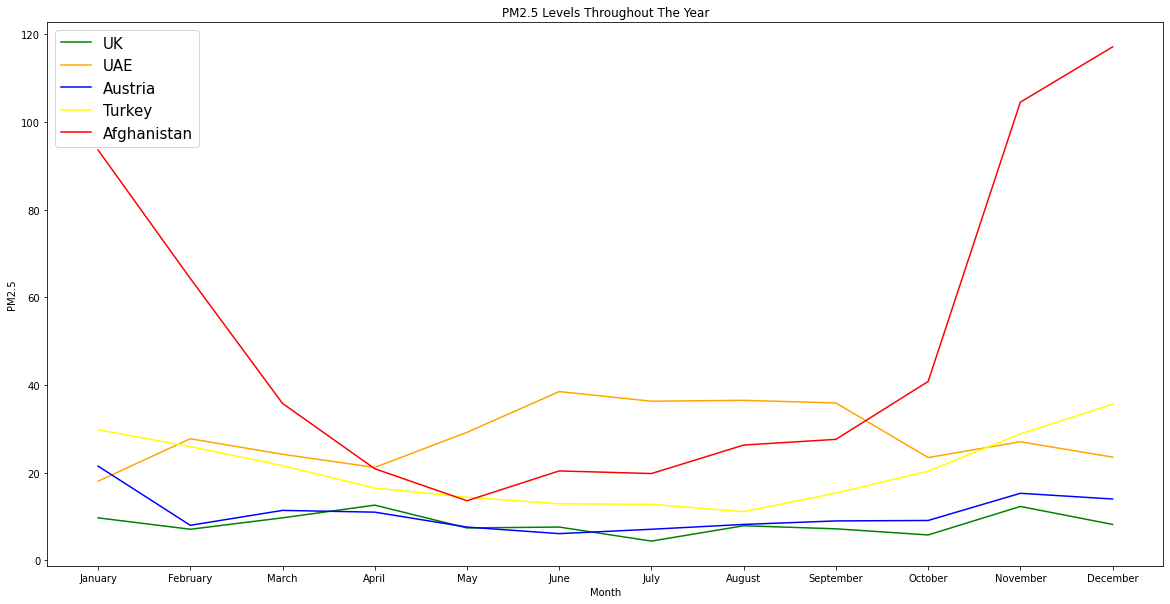

In [23]:
figure, axs = plt.subplots(1, figsize = (20, 10))
x = np.array(["January", "February", "March","April","May","June","July",
                                  "August","September","October","November","December"])
y1=Months_median_df['United Kingdom'] 
y2=Months_median_df['United Arab Emirates'] 
y3=Months_median_df['Austria']
y4=Months_median_df['Turkey']
y5=Months_median_df['Afghanistan']

plt.plot(x, y1,label='UK',color='green')
plt.plot(x, y2,label='UAE',color='orange')
plt.plot(x, y3,label='Austria',color='blue')
plt.plot(x, y4,label='Turkey',color='yellow')
plt.plot(x, y5,label='Afghanistan',color='red')

plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.title("PM2.5 Levels Throughout The Year")

plt.legend(fontsize=15)
plt.show()  # show first chart

<AxesSubplot:>

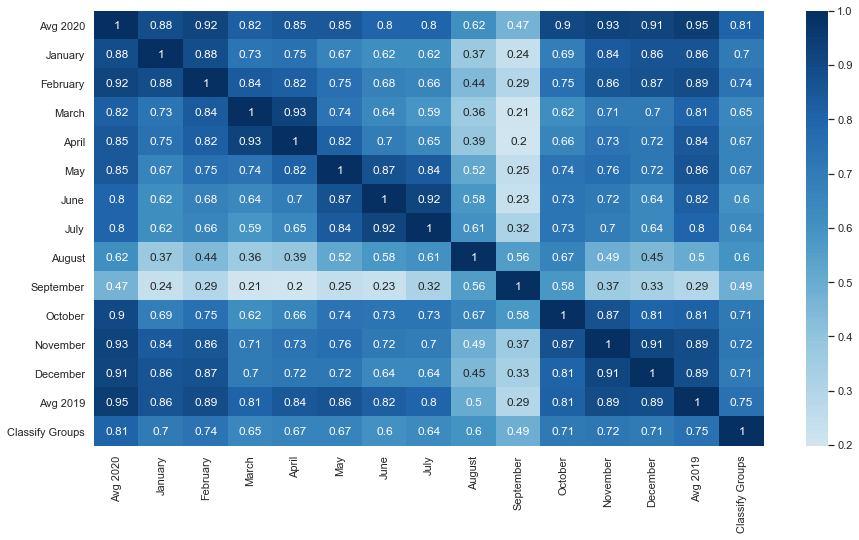

In [24]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(),cmap='RdBu',center=0,annot=True)

<AxesSubplot:xlabel='Country'>

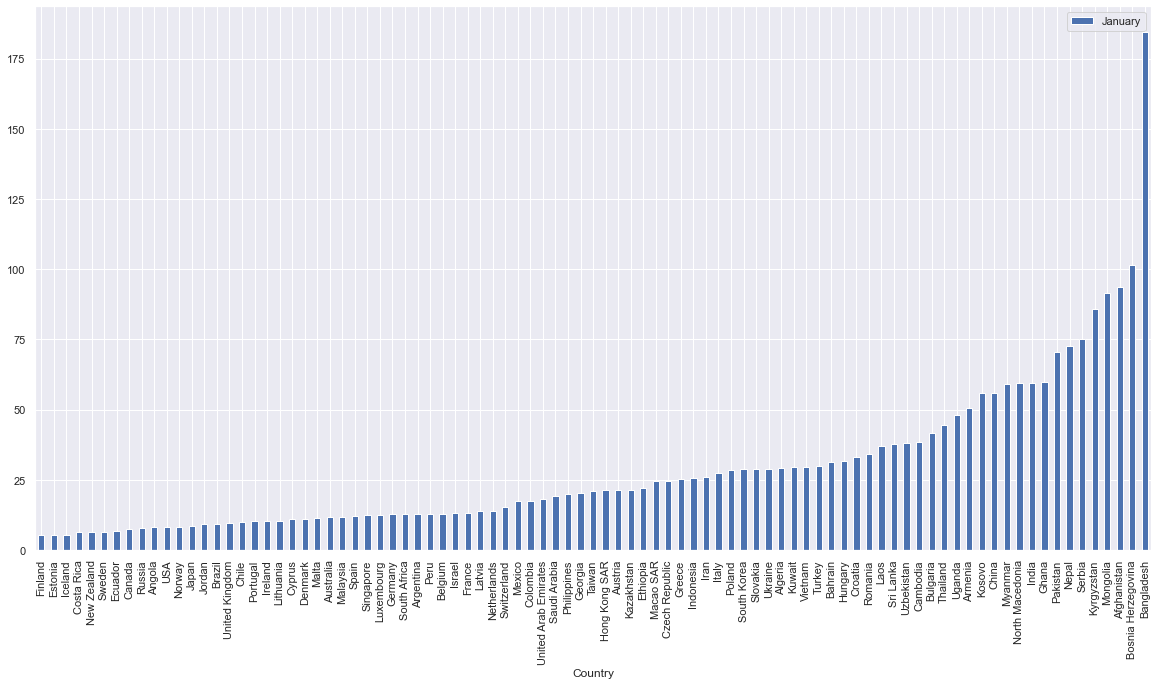

In [25]:
df[['Country','January']].groupby('Country').median().sort_values('January').plot(kind='bar',figsize=(20,10))

<AxesSubplot:xlabel='Country'>

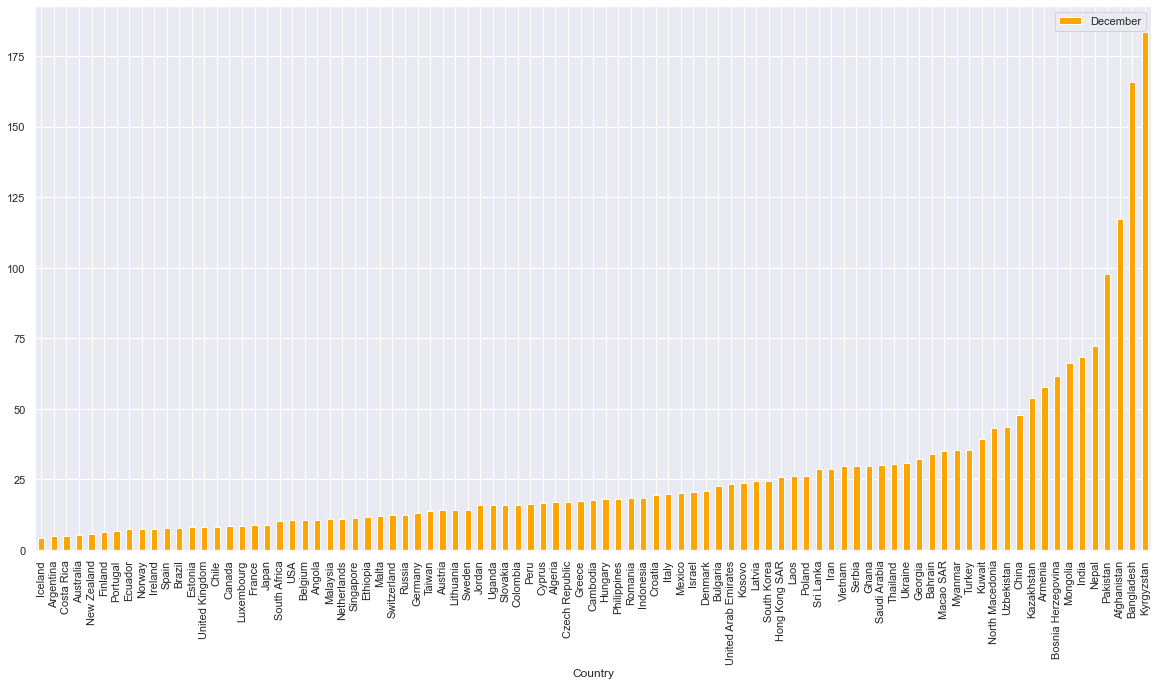

In [26]:
df[['Country','December']].groupby('Country').median().sort_values('December').plot(kind='bar',figsize=(20,10),color='orange')